In [1]:
from ece470_lib import *
from time import time
from IPython.display import clear_output
inTOmm = 25.4;

# Joint Axes Orientations
a0 = [0,0,1];
a1 = [0,-1,0];
a2 = [0,-1,0];
a3 = [0,-1,0];
a4 = [1,0,0];
a5 = [1,0,0];

# Joint Axes Positions (Ant point on axis)
q0 = [0,0,0];
q1 = [3.76*inTOmm,0,8.11*inTOmm];
q2 = [11.76*inTOmm,0,8.11*inTOmm];
q3 = [17.76*inTOmm,0,8.11*inTOmm];
q4 = [19.48*inTOmm,0,8.11*inTOmm];
q5 = [19.48*inTOmm,50,8.11*inTOmm];

# Convert to Screws (rotation about an axis+linear motions along screw)
s0 = toScrew(a0,q0);
s1 = toScrew(a1,q1);
s2 = toScrew(a2,q2);
s3 = toScrew(a3,q3);
s4 = toScrew(a4,q4);
s5 = toScrew(a5,q5);

# Assemble Screw Bank
S=[s0,s1,s2,s3,s4]#,s5]


#       [xToolInSpace, yToolInSpace, zToolInSpace]
toolRot = np.array([[ 0,0,1],# tool frame axes expressed in space frame coordiantes
                    [ 0,1,0],
                    [-1,0,0]]);

toolPos = np.array([[19.48*inTOmm+400 , 0 , 8.11*inTOmm]]).transpose(); #position of tool end in space frame
M=toPose(toolRot,toolPos); # Assemble Pose Matrix of Tool in space frame coordiantes

# define goal Pose
goalRot = np.eye(3);
X=np.arange(-10,500,20);
# Y=X;
Y=np.array([0])
Z=np.arange(600,1220,20)

In [2]:
def validThetas():
    validTheta = np.zeros((X.size, Y.size, Z.size)); # indicates presence of solution at each test point
    thetaMap = [[[np.ones((6,1))*-99 for i in range(Z.size)] for j in range(Y.size)] for k in range(X.size)]; #initiate ik Map
    valCount=0
    invalCount = 0
    totCount=0
    lastValTheta = np.zeros((len(S[0]),1)) #stores last ik solution
    tcur=time()
    tprev=time()
    tstart=time()
    for i in range(X.size):
        for j in range(Y.size):
            for k in range(Z.size):
                print("valid=",valCount,"invalid=",invalCount,"tested",totCount,"out of",X.size*Y.size*Z.size,[X[i],Y[j],Z[k]])
                print(tcur-tprev)
                totCount+=1
                goalPos = np.array([[X[i],Y[j],Z[k]]]).transpose();
                goalT = toPose(goalRot,goalPos);
                thetaMat,norm = findIK(goalT, S,M,max_iter=100);
#                 clear_output(wait=True)
                if(len(thetaMat)>0):
                    print(len(thetaMat))
    #                 print(thetaMat,"\n")
                    valCount+=1
                    lastValTheta=thetaMat[0]
                    validTheta[i,j,k]=len(thetaMat);
                    thetaMap[i][j][k]=thetaMat;
                else:
                    invalCount+=1
                    print(norm)
                tcur = time()
                print((tcur-tstart)/totCount*(X.size*Y.size*Z.size-totCount)/3600,'hours until done')
                tprev = tcur
    return [validTheta,thetaMap]

In [3]:
# print(X.size,Y.size,Z.size)

In [4]:
# # goalRot = np.eye(3);
# idx=866
# goalPos = np.array([[xs[idx]],[0],[zs[idx]]]);
# goalT = toPose(goalRot,goalPos);
# thetaMat,norm = findIK(goalT, S,M,max_iter=100);
# print(thetaMat)
# # out = evalT(S,[0,20/180*np.pi,130/180*np.pi,-60/180*np.pi,0],M)
# out = evalT(S,thetaMat[0],M)

# rot,pos = fromPose(out)
# print(rot)
# print(pos)
# print(xs[idx],zs[idx])

In [5]:
# i=np.where(X==440)[0][0]
# j=0
# k=np.where(Z==840)[0][0]
# print(X[i],Y[j],Z[k])
# print(thetaMap[i][j][k])

In [6]:
# shp = [len(thetaMap),len(thetaMap[0]),len(thetaMap[0][0])]
# for i in range(shp[0]):
#     for j in range(shp[1]):
#         for k in range(shp[2]):
#             print([X[i],Y[j],Z[k]])
#             for thet in thetaMap[i][j][j]:
#                 print(thet)
#             print()

In [7]:
# count=0
# for i in range(validTheta.shape[0]):
#     for j in range(validTheta.shape[1]):
#         for k in range(validTheta.shape[2]):
#             if(validTheta[i,j,k]==0):
#                 print((X[i],Y[j],Z[k]));
#                 count+=1
                
# print("unreachable points =", count)

In [8]:
# print(thetaMap[0][0][0])

In [9]:

# tmstop = gmtime()

In [10]:
# print(tmstop)

In [11]:
# %store -r thetaMap validTheta

In [12]:
# print(isValidTheta([[159],[120]]))

In [13]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))
# plt.minorticks_on()
# plt.grid(b=True, which='major', color='b', linestyle='-')
# plt.grid(b=True, which='minor', color='g', linestyle='-')
# plt.xlim(-10,550)
# plt.ylim(400,1050)
# plt.xlabel('X (mm)')
# plt.ylabel('Z (mm)')
# xs=[]
# zs=[]
# for i in range(X.size):
#     for j in range(Y.size):
#         for k in range(Z.size):
#             if(validTheta[i,j,k]>0):
#                 xs.append(X[i])
#                 zs.append(Z[k])
# for i in range(len(zs)):
#     zs[i]=zs[i]-200
# plt.scatter(xs,zs,s=5,color='gray')
# plt.title("Dorna 1 Achievable XZ positions w/ 60cm Tool, No Offset")
# plt.savefig("XZ_SpatialFreedom60cmTool.png")

In [14]:
from math import sqrt
goalRot = np.array([[sqrt(2)/2,0,sqrt(2)/2],[0,1,0],[-sqrt(2)/2,0,sqrt(2)/2]]).transpose()

In [15]:
validTheta45, thetaMap45 = validThetas()

valid= 0 invalid= 0 tested 0 out of 806 [-10, 0, 600]
0.0
1
0.07357749111122555 hours until done
valid= 1 invalid= 0 tested 1 out of 806 [-10, 0, 620]
0.0
1
0.07147807319959004 hours until done
valid= 2 invalid= 0 tested 2 out of 806 [-10, 0, 640]
0.0
1
0.06628513654073079 hours until done
valid= 3 invalid= 0 tested 3 out of 806 [-10, 0, 660]
0.0
1
0.06461837417549557 hours until done
valid= 4 invalid= 0 tested 4 out of 806 [-10, 0, 680]
0.0
1
0.06357288360595703 hours until done
valid= 5 invalid= 0 tested 5 out of 806 [-10, 0, 700]
0.0
1
0.06255796220567492 hours until done
valid= 6 invalid= 0 tested 6 out of 806 [-10, 0, 720]
0.0
1
0.061754804830702524 hours until done
valid= 7 invalid= 0 tested 7 out of 806 [-10, 0, 740]
0.0
1
0.060879086901744206 hours until done
valid= 8 invalid= 0 tested 8 out of 806 [-10, 0, 760]
0.0
1
0.06157184816437002 hours until done
valid= 9 invalid= 0 tested 9 out of 806 [-10, 0, 780]
0.0
1
0.06201655986573961 hours until done
valid= 10 invalid= 0 tested 

110.13508549477075
0.6188703962812175 hours until done
valid= 30 invalid= 47 tested 77 out of 806 [30, 0, 900]
0.0
616.8826465085277
0.6221937688191732 hours until done
valid= 30 invalid= 48 tested 78 out of 806 [30, 0, 920]
0.0
427.6299916468859
0.6223803391268821 hours until done
valid= 30 invalid= 49 tested 79 out of 806 [30, 0, 940]
0.0
447.8774427633164
0.6249142301777999 hours until done
valid= 30 invalid= 50 tested 80 out of 806 [30, 0, 960]
0.0
460.4164901253499
0.6319133320871858 hours until done
valid= 30 invalid= 51 tested 81 out of 806 [30, 0, 980]
0.0
257.76205529413187
0.6372121462040155 hours until done
valid= 30 invalid= 52 tested 82 out of 806 [30, 0, 1000]
0.0
241.81407546270754
0.6429000908184243 hours until done
valid= 30 invalid= 53 tested 83 out of 806 [30, 0, 1020]
0.0
480.21236777892176
0.6451534456125013 hours until done
valid= 30 invalid= 54 tested 84 out of 806 [30, 0, 1040]
0.0
696.5868753007397
0.6502769928632998 hours until done
valid= 30 invalid= 55 teste

/Users/MoBo/anaconda3/lib/python3.7/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:838: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearlySingularWarning)


1086.372910586508
0.6177441171177878 hours until done
valid= 45 invalid= 106 tested 151 out of 806 [70, 0, 1140]
0.0
502.54747404357437
0.6173139273414486 hours until done
valid= 45 invalid= 107 tested 152 out of 806 [70, 0, 1160]
0.0
995.6809274691801
0.6177054474218737 hours until done
valid= 45 invalid= 108 tested 153 out of 806 [70, 0, 1180]
0.0
1665.7288740714882
0.6182947002620064 hours until done
valid= 45 invalid= 109 tested 154 out of 806 [70, 0, 1200]
0.0
1244.0086658312453
0.6188424307107926 hours until done
valid= 45 invalid= 110 tested 155 out of 806 [90, 0, 600]
0.0
1
0.6141628010405434 hours until done
valid= 46 invalid= 110 tested 156 out of 806 [90, 0, 620]
0.0
1
0.6095698522420446 hours until done
valid= 47 invalid= 110 tested 157 out of 806 [90, 0, 640]
0.0
1
0.6050027335746379 hours until done
valid= 48 invalid= 110 tested 158 out of 806 [90, 0, 660]
0.0
1
0.6005092103822011 hours until done
valid= 49 invalid= 110 tested 159 out of 806 [90, 0, 680]
0.0
1
0.596109296

61.06506495795016
0.55708888759379 hours until done
valid= 53 invalid= 170 tested 223 out of 806 [130, 0, 720]
0.0
111.65849103308305
0.555851977871997 hours until done
valid= 53 invalid= 171 tested 224 out of 806 [130, 0, 740]
0.0
58.44287276947209
0.5546154580004421 hours until done
valid= 53 invalid= 172 tested 225 out of 806 [130, 0, 760]
0.0
711.457667751117
0.5533779231437657 hours until done
valid= 53 invalid= 173 tested 226 out of 806 [130, 0, 780]
0.0
571.1381208554958
0.5523174454015782 hours until done
valid= 53 invalid= 174 tested 227 out of 806 [130, 0, 800]
0.0
341.4858756959736
0.55124343369846 hours until done
valid= 53 invalid= 175 tested 228 out of 806 [130, 0, 820]
0.0
668.5290076234779
0.5502817008834855 hours until done
valid= 53 invalid= 176 tested 229 out of 806 [130, 0, 840]
0.0
709.2021378956539
0.5496987576692001 hours until done
valid= 53 invalid= 177 tested 230 out of 806 [130, 0, 860]
0.0
7.3653452307765015
0.5494595622431492 hours until done
valid= 53 inva

552.2543022815871
0.5098358070097686 hours until done
valid= 53 invalid= 240 tested 293 out of 806 [170, 0, 880]
0.0
374.5241203273248
0.5092030534001796 hours until done
valid= 53 invalid= 241 tested 294 out of 806 [170, 0, 900]
0.0
452.01076642276075
0.5085350106238421 hours until done
valid= 53 invalid= 242 tested 295 out of 806 [170, 0, 920]
0.0
757.9145420387349
0.5079102578128244 hours until done
valid= 53 invalid= 243 tested 296 out of 806 [170, 0, 940]
0.0
337.59438239723244
0.5071991997141094 hours until done
valid= 53 invalid= 244 tested 297 out of 806 [170, 0, 960]
0.0
636.9693389783346
0.5065042166084073 hours until done
valid= 53 invalid= 245 tested 298 out of 806 [170, 0, 980]
0.0
377.75598616430216
0.5056258382745411 hours until done
valid= 53 invalid= 246 tested 299 out of 806 [170, 0, 1000]
0.0
991.7322236690744
0.5050673700019165 hours until done
valid= 53 invalid= 247 tested 300 out of 806 [170, 0, 1020]
0.0
1432.8100875956006
0.5045100541077844 hours until done
vali

1279.644882984643
0.4558499625855204 hours until done
valid= 53 invalid= 310 tested 363 out of 806 [210, 0, 1040]
0.0
513.7834748813036
0.4551364929997732 hours until done
valid= 53 invalid= 311 tested 364 out of 806 [210, 0, 1060]
0.0
981.620302856084
0.45429653928377856 hours until done
valid= 53 invalid= 312 tested 365 out of 806 [210, 0, 1080]
0.0
621.2001988919395
0.4535648862014196 hours until done
valid= 53 invalid= 313 tested 366 out of 806 [210, 0, 1100]
0.0
1064.230331306323
0.4528930877067448 hours until done
valid= 53 invalid= 314 tested 367 out of 806 [210, 0, 1120]
0.0
1508.934025529083
0.4521664465251176 hours until done
valid= 53 invalid= 315 tested 368 out of 806 [210, 0, 1140]
0.0
1004.0537702469328
0.45146043297182686 hours until done
valid= 53 invalid= 316 tested 369 out of 806 [210, 0, 1160]
0.0
997.2308881278265
0.4507368308287841 hours until done
valid= 53 invalid= 317 tested 370 out of 806 [210, 0, 1180]
0.0
988.5801951339226
0.45003100846227184 hours until done

1375.8763537894704
0.3957942427576644 hours until done
valid= 53 invalid= 380 tested 433 out of 806 [250, 0, 1200]
0.0
1043.5572334091278
0.394922247216815 hours until done
valid= 53 invalid= 381 tested 434 out of 806 [270, 0, 600]
0.0
662.4502492645624
0.3938952586235214 hours until done
valid= 53 invalid= 382 tested 435 out of 806 [270, 0, 620]
0.0
924.7211611869908
0.39292963053594426 hours until done
valid= 53 invalid= 383 tested 436 out of 806 [270, 0, 640]
0.0
462.3391420182459
0.3918824314771037 hours until done
valid= 53 invalid= 384 tested 437 out of 806 [270, 0, 660]
0.0
956.8381170706698
0.39085371277043196 hours until done
valid= 53 invalid= 385 tested 438 out of 806 [270, 0, 680]
0.0
676.577690750833
0.38987073967348806 hours until done
valid= 53 invalid= 386 tested 439 out of 806 [270, 0, 700]
0.0
170.2001453653533
0.38886579295180057 hours until done
valid= 53 invalid= 387 tested 440 out of 806 [270, 0, 720]
0.0
874.3034190831021
0.3878507679995195 hours until done
valid

361.4064678375329
0.32890513113786873 hours until done
valid= 53 invalid= 450 tested 503 out of 806 [310, 0, 740]
0.0
355.1204292822816
0.3276745799670039 hours until done
valid= 53 invalid= 451 tested 504 out of 806 [310, 0, 760]
0.0
355.00262481608115
0.32651746940743936 hours until done
valid= 53 invalid= 452 tested 505 out of 806 [310, 0, 780]
0.0
355.11387915824815
0.32546448303148523 hours until done
valid= 53 invalid= 453 tested 506 out of 806 [310, 0, 800]
0.0
904.3233755066099
0.3244765436802155 hours until done
valid= 53 invalid= 454 tested 507 out of 806 [310, 0, 820]
0.0
1035.8860715080414
0.32344633211222845 hours until done
valid= 53 invalid= 455 tested 508 out of 806 [310, 0, 840]
0.0
1207.8870331789717
0.32241191666697705 hours until done
valid= 53 invalid= 456 tested 509 out of 806 [310, 0, 860]
0.0
861.9978858530028
0.32149406633709515 hours until done
valid= 53 invalid= 457 tested 510 out of 806 [310, 0, 880]
0.0
1211.7735021492126
0.3205750928544096 hours until done

1033.3999432256828
0.2574094168341666 hours until done
valid= 53 invalid= 520 tested 573 out of 806 [350, 0, 900]
0.0
1163.854721474694
0.2563765275196839 hours until done
valid= 53 invalid= 521 tested 574 out of 806 [350, 0, 920]
0.0
1098.0546120865436
0.2553400357125462 hours until done
valid= 53 invalid= 522 tested 575 out of 806 [350, 0, 940]
0.0
898.1804303782118
0.25431404770639393 hours until done
valid= 53 invalid= 523 tested 576 out of 806 [350, 0, 960]
0.0
1120.3908507961771
0.25331241472950106 hours until done
valid= 53 invalid= 524 tested 577 out of 806 [350, 0, 980]
0.0
1226.3496297657523
0.252301490240856 hours until done
valid= 53 invalid= 525 tested 578 out of 806 [350, 0, 1000]
0.0
1228.4611464666261
0.2513289954380485 hours until done
valid= 53 invalid= 526 tested 579 out of 806 [350, 0, 1020]
0.0
1084.9141562238153
0.25029782718899607 hours until done
valid= 53 invalid= 527 tested 580 out of 806 [350, 0, 1040]
0.0
925.1679522847663
0.24927071688405003 hours until don

1149.5460705899632
0.18370477680490901 hours until done
valid= 53 invalid= 590 tested 643 out of 806 [390, 0, 1060]
0.0
853.972968945941
0.18262208006952121 hours until done
valid= 53 invalid= 591 tested 644 out of 806 [390, 0, 1080]
0.0
1020.3594501117938
0.1815370702827726 hours until done
valid= 53 invalid= 592 tested 645 out of 806 [390, 0, 1100]
0.0
1784.9531055757093
0.18045696360900063 hours until done
valid= 53 invalid= 593 tested 646 out of 806 [390, 0, 1120]
0.0
1155.2703497537243
0.1793786849393972 hours until done
valid= 53 invalid= 594 tested 647 out of 806 [390, 0, 1140]
0.0
1015.0911140304063
0.17829012300967356 hours until done
valid= 53 invalid= 595 tested 648 out of 806 [390, 0, 1160]
0.0
1197.4746505256421
0.17720064054733883 hours until done
valid= 53 invalid= 596 tested 649 out of 806 [390, 0, 1180]
0.0
1147.5881290672535
0.17611255687077843 hours until done
valid= 53 invalid= 597 tested 650 out of 806 [390, 0, 1200]
0.0
1317.8880815354794
0.17502257693066167 hours

1132.0972675576018
0.10663669880749523 hours until done
valid= 53 invalid= 660 tested 713 out of 806 [450, 0, 600]
0.0
1129.6287454221624
0.10548781959839118 hours until done
valid= 53 invalid= 661 tested 714 out of 806 [450, 0, 620]
0.0
1387.894365105249
0.1043395887842082 hours until done
valid= 53 invalid= 662 tested 715 out of 806 [450, 0, 640]
0.0
872.2798921849626
0.10321255475282669 hours until done
valid= 53 invalid= 663 tested 716 out of 806 [450, 0, 660]
0.0
973.4907106205264
0.1020607712776665 hours until done
valid= 53 invalid= 664 tested 717 out of 806 [450, 0, 680]
0.0
955.8431471331525
0.10097380057535317 hours until done
valid= 53 invalid= 665 tested 718 out of 806 [450, 0, 700]
0.0
516.6411871492555
0.0998319492452831 hours until done
valid= 53 invalid= 666 tested 719 out of 806 [450, 0, 720]
0.0
1308.122824134405
0.09870049811697301 hours until done
valid= 53 invalid= 667 tested 720 out of 806 [450, 0, 740]
0.0
952.2775596023722
0.09756168924314543 hours until done
va

1369.4676569287371
0.02659265163614003 hours until done
valid= 53 invalid= 730 tested 783 out of 806 [490, 0, 760]
0.0
1173.915585105007
0.025440464069614872 hours until done
valid= 53 invalid= 731 tested 784 out of 806 [490, 0, 780]
0.0
923.8061924107022
0.024286588712356148 hours until done
valid= 53 invalid= 732 tested 785 out of 806 [490, 0, 800]
0.0
929.3118929999767
0.02313218821163463 hours until done
valid= 53 invalid= 733 tested 786 out of 806 [490, 0, 820]
0.0
1176.9067171032655
0.021977852016085708 hours until done
valid= 53 invalid= 734 tested 787 out of 806 [490, 0, 840]
0.0
1233.5436128636707
0.020823153090961086 hours until done
valid= 53 invalid= 735 tested 788 out of 806 [490, 0, 860]
0.0
1121.0512074973765
0.01966830537891979 hours until done
valid= 53 invalid= 736 tested 789 out of 806 [490, 0, 880]
0.0
917.5228919443684
0.01851307170803537 hours until done
valid= 53 invalid= 737 tested 790 out of 806 [490, 0, 900]
0.0
1669.6284135380165
0.01735771341234433 hours unt

In [16]:
# print(thetaMap[i,j,k,:])
# print(xs[933],zs[933])

In [17]:
# %store validTheta45
# %store -r validTheta45

NameError: name 'xs' is not defined

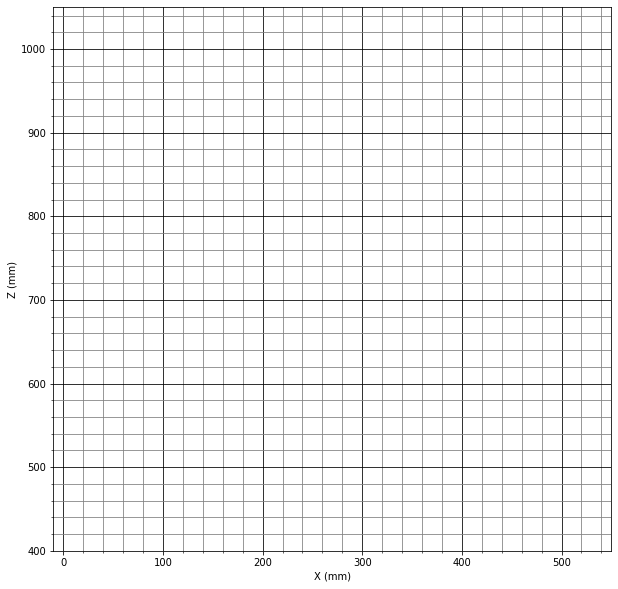

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='-')
plt.xlim(-10,550)
plt.ylim(400,1050)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
xs45=[]
zs45=[]
for i in range(xs.size):
    if(validThetaMinus45[i,0,0]>0):
        xs45.append(xs[i])
        zs45.append(zs[i])
for i in range(len(zs45)):
    zs45[i]=zs45[i]
# plt.scatter(xs,zs,s=5,color='blue')
plt.scatter(xs45,zs45,s=5,color='red')
def split(l1,l2):
    same=[]
    foundSame = np.zeros((len(l1),len(l2)))
    for i in range(len(ll)):
        for j in range(len(l2)):
            if(l1[i]==l2[j]):
                same.append(l1[i])
                foundSame[i,j]=1
    return same

plt.title("Dorna 1 Achievable XZ positions 45deg w/ 40cm Tool 0cm Offset")
plt.savefig("XZ_SpatialFreedom45degWith0cmOffset40cmTool.png")